<a href="https://colab.research.google.com/github/eunssung5/2021.01.25/blob/master/%EC%BD%94%EB%9E%A9_%ED%99%98%EA%B2%BD_%EC%82%B4%ED%8E%B4%EB%B3%B4%EA%B8%B0_%EB%B0%8F_%ED%8C%8C%EC%9D%BC_%EC%97%85%EB%A1%9C%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!cat /etc/issue.net

Ubuntu 18.04.5 LTS


In [2]:
!head /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0


In [6]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [5]:
!python --version

Python 3.7.10


#### 파일 업로드

In [7]:
from google.colab import files

In [9]:
myfile = files.upload()

Saving auto-mpg.csv to auto-mpg.csv


In [10]:
myfile

{'auto-mpg.csv': b'\xef\xbb\xbf18.0,8,307.0,130.0,3504.,12.0,70,1,"chevrolet chevelle malibu"\r\n15.0,8,350.0,165.0,3693.,11.5,70,1,"buick skylark 320"\r\n18.0,8,318.0,150.0,3436.,11.0,70,1,"plymouth satellite"\r\n16.0,8,304.0,150.0,3433.,12.0,70,1,"amc rebel sst"\r\n17.0,8,302.0,140.0,3449.,10.5,70,1,"ford torino"\r\n15.0,8,429.0,198.0,4341.,10.0,70,1,"ford galaxie 500"\r\n14.0,8,454.0,220.0,4354., 9.0,70,1,"chevrolet impala"\r\n14.0,8,440.0,215.0,4312., 8.5,70,1,"plymouth fury iii"\r\n14.0,8,455.0,225.0,4425.,10.0,70,1,"pontiac catalina"\r\n15.0,8,390.0,190.0,3850., 8.5,70,1,"amc ambassador dpl"\r\n15.0,8,383.0,170.0,3563.,10.0,70,1,"dodge challenger se"\r\n14.0,8,340.0,160.0,3609., 8.0,70,1,"plymouth \'cuda 340"\r\n15.0,8,400.0,150.0,3761., 9.5,70,1,"chevrolet monte carlo"\r\n14.0,8,455.0,225.0,3086.,10.0,70,1,"buick estate wagon (sw)"\r\n24.0,4,113.0,95.00,2372.,15.0,70,3,"toyota corona mark ii"\r\n22.0,6,198.0,95.00,2833.,15.5,70,1,"plymouth duster"\r\n18.0,6,199.0,97.00,2774.,15.

In [11]:
import pandas as pd

# encoding
datasets = pd.read_csv('auto-mpg.csv', encoding='utf-8')
datasets.head()

,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


In [24]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential, Model

import numpy as np
import pandas as pd
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


In [36]:
(x_train, y_train) , (x_test , y_test) = keras.datasets.mnist.load_data()

In [37]:

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [38]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dropout


x_train,x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                test_size = 0.3,
                                                random_state = 100)

In [39]:

input = Input(shape=(784,), name='input')

hidden1 = Dense(256 , activation = 'sigmoid', name = 'hidden1')(input)
hidden2 = Dense(128 , activation = 'sigmoid', name = 'hidden2')(hidden1)
hidden3 = Dense(64 , activation = 'sigmoid', name = 'hidden3')(hidden2)
hidden4 = Dense(32 , activation = 'sigmoid', name = 'hidden4')(hidden3)

output =  Dense(10 , activation = 'softmax', name = 'output')(hidden4)

model = Model(inputs=[input], outputs=[output])


In [40]:
from tensorflow.keras.optimizers import SGD

optimizer = SGD(learning_rate=0.01)
model.compile(optimizer = optimizer ,
              loss      = 'categorical_crossentropy',
              metrics   = ['accuracy'])

In [42]:
callbacks = [EarlyStopping(monitor='val_accuracy', patience=3)]
history= model.fit(x_train, y_train , batch_size = 2000, epochs = 200 ,validation_data=(x_val , y_val), callbacks=callbacks)

Epoch 1/200
21/21 [==============================] - 2s 73ms/step - loss: 0.3639 - accuracy: 0.9256 - val_loss: 0.4120 - val_accuracy: 0.9073
Epoch 2/200
21/21 [==============================] - 1s 62ms/step - loss: 0.3582 - accuracy: 0.9275 - val_loss: 0.4108 - val_accuracy: 0.9070
Epoch 3/200
21/21 [==============================] - 1s 64ms/step - loss: 0.3545 - accuracy: 0.9293 - val_loss: 0.4096 - val_accuracy: 0.9081
Epoch 4/200
21/21 [==============================] - 1s 64ms/step - loss: 0.3517 - accuracy: 0.9300 - val_loss: 0.4087 - val_accuracy: 0.9088
Epoch 5/200
21/21 [==============================] - 1s 64ms/step - loss: 0.3495 - accuracy: 0.9311 - val_loss: 0.4078 - val_accuracy: 0.9087
Epoch 6/200
21/21 [==============================] - 1s 62ms/step - loss: 0.3473 - accuracy: 0.9318 - val_loss: 0.4069 - val_accuracy: 0.9094
Epoch 7/200
21/21 [==============================] - 1s 62ms/step - loss: 0.3454 - accuracy: 0.9323 - val_loss: 0.4061 - val_accuracy: 0.9091
Epoch 

In [34]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

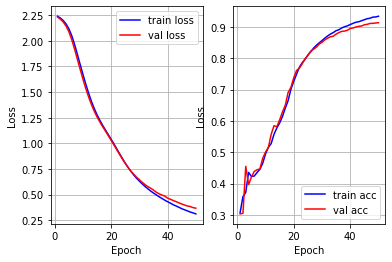

In [35]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

fig = plt.figure()
ax01 = fig.add_subplot(1,2,1)

epochs = range(1, len(loss)+1)

ax01.plot(epochs , loss , color = 'blue', label= 'train loss')
ax01.plot(epochs , val_loss , color = 'red', label= 'val loss')
ax01.set_xlabel('Epoch')
ax01.set_ylabel('Loss')
ax01.grid()
ax01.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

ax02 = fig.add_subplot(1,2,2)
ax02.plot(epochs , acc , color = 'blue', label= 'train acc')
ax02.plot(epochs , val_acc , color = 'red', label= 'val acc')
ax02.set_xlabel('Epoch')
ax02.set_ylabel('Loss')
ax02.grid()
ax02.legend()